# DATA PREPARATION

## Import libraries

In [ ]:
!apt update
!apt install chromium-chromedriver
!pip install selenium

Ign:1 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://security.ubuntu.com/ubuntu

In [ ]:
# data and networks
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# web scraping
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
import time
from tqdm import tqdm

In [ ]:
# define source URLs
url_airports = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat"
url_routes = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat"
url_planes = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/planes.dat"

## Airports data

In [ ]:
# load data
airports = pd.read_csv(url_airports, header=None, na_values='\\N', encoding='utf-8-sig')

# set column names
airports.rename(axis=1, inplace=True, mapper={0:  "airport_id", 
                                              1:  "airport_name", 
                                              2:  "city_name", 
                                              3:  "country_name", 
                                              4:  "airport_code_iata", 
                                              5:  "airport_code_icao", 
                                              6:  "latitude", 
                                              7:  "longitude", 
                                              8:  "altitude",
                                              9:  "timezone",
                                              10: "daylight_savings_time",
                                              11: "timezone_tz",
                                              12: "hub_type",
                                              13: "data_source"})

In [ ]:
# look at data
airports

,airport_id,airport_name,city_name,country_name,airport_code_iata,airport_code_icao,latitude,longitude,altitude,timezone,daylight_savings_time,timezone_tz,hub_type,data_source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10.0,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10.0,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10.0,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10.0,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10.0,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7693,14106,Rogachyovo Air Base,Belaya,Russia,NaN,ULDA,71.616699,52.478298,272,NaN,NaN,NaN,airport,OurAirports
7694,14107,Ulan-Ude East Airport,Ulan Ude,Russia,NaN,XIUW,51.849998,107.737999,1670,NaN,NaN,NaN,airport,OurAirports
7695,14108,Krechevitsy Air Base,Novgorod,Russia,NaN,ULLK,58.625000,31.385000,85,NaN,NaN,NaN,airport,OurAirports
7696,14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,NaN,NaN,NaN,airport,OurAirports


In [ ]:
# inspect missings
airports.isnull().sum()

airport_id                  0
airport_name                0
city_name                  49
country_name                0
airport_code_iata        1626
airport_code_icao           1
latitude                    0
longitude                   0
altitude                    0
timezone                  353
daylight_savings_time     353
timezone_tz              1021
hub_type                    0
data_source                 0
dtype: int64

There is only one observation with missing ICAO code which is weird, why only one? Let's find out.

In [ ]:
airports[airports.airport_code_icao.isnull()]

,airport_id,airport_name,city_name,country_name,airport_code_iata,airport_code_icao,latitude,longitude,altitude,timezone,daylight_savings_time,timezone_tz,hub_type,data_source
5860,7909,Sun Island Resort and SPA,South Aari Atoll,Maldives,NaN,NaN,3.488334,72.862989,0,-3.0,N,America/Sao_Paulo,airport,OurAirports


There exists no airport on the Sun Island Resort and SPA (check Google maps!). The closes airport is Maamigili's Villa Airport on the next island but that's already listed with airport_id 8840. Also this entry is very weird because it's supposed to be in the Maldives but America/Sao_Paulo is given as timezone. Let's delete this observation since it doesn't make sense at all.

In [ ]:
# drop weird observation
airports = airports[~(airports.airport_code_icao.isnull())]

In [ ]:
# inspect missings
airports.isnull().sum()

airport_id                  0
airport_name                0
city_name                  49
country_name                0
airport_code_iata        1625
airport_code_icao           0
latitude                    0
longitude                   0
altitude                    0
timezone                  353
daylight_savings_time     353
timezone_tz              1021
hub_type                    0
data_source                 0
dtype: int64

In [ ]:
# entries in the airports database are unique in terms of airport_id or airport_code_icao
print("Dataset length:", len(airports))
print("Duplicates in airport_id?", np.unique(airports[['airport_id']].duplicated(), return_counts=True))
print("Duplicates in airport_name?", np.unique(airports[['airport_name']].duplicated(), return_counts=True))
print("Duplicates in airport_code_icao?", np.unique(airports[['airport_code_icao']].duplicated(), return_counts=True))

Dataset length: 7697
Duplicates in airport_id? (array([False]), array([7697]))
Duplicates in airport_name? (array([False,  True]), array([7657,   40]))
Duplicates in airport_code_icao? (array([False]), array([7697]))


## Routes data

In [ ]:
# load data
routes = pd.read_csv(url_routes, header=None, na_values='\\N', encoding='utf-8-sig')

# set column names
routes.rename(axis=1, inplace=True, mapper={0: "airline_code", 
                                            1: "airline_id", 
                                            2: "dep_airport_code", 
                                            3: "dep_airport_id", 
                                            4: "arr_airport_code", 
                                            5: "arr_airport_id", 
                                            6: "codeshare_dummy", 
                                            7: "nr_stops", 
                                            8: "plane_type_list"})

In [ ]:
# look at data
routes

,airline_code,airline_id,dep_airport_code,dep_airport_id,arr_airport_code,arr_airport_id,codeshare_dummy,nr_stops,plane_type_list
0,2B,410.0,AER,2965.0,KZN,2990.0,NaN,0,CR2
1,2B,410.0,ASF,2966.0,KZN,2990.0,NaN,0,CR2
2,2B,410.0,ASF,2966.0,MRV,2962.0,NaN,0,CR2
3,2B,410.0,CEK,2968.0,KZN,2990.0,NaN,0,CR2
4,2B,410.0,CEK,2968.0,OVB,4078.0,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178.0,WYA,6334.0,ADL,3341.0,NaN,0,SF3
67659,ZM,19016.0,DME,4029.0,FRU,2912.0,NaN,0,734
67660,ZM,19016.0,FRU,2912.0,DME,4029.0,NaN,0,734
67661,ZM,19016.0,FRU,2912.0,OSS,2913.0,NaN,0,734


In [ ]:
# inspect missings
routes.isnull().sum()

airline_code            0
airline_id            479
dep_airport_code        0
dep_airport_id        220
arr_airport_code        0
arr_airport_id        221
codeshare_dummy     53066
nr_stops                0
plane_type_list        18
dtype: int64

We have very many missings in codeshare dummy but those are "false" missings. The dummy is constructed to have "Y" if it's codeshared, else nothing. Let's fix that issue by replacing missings with "N".

In [ ]:
# replace "false" missings in codeshare_dummy with 'N'
routes.codeshare_dummy.fillna('N', inplace=True)
routes.isnull().sum() # inspect again

airline_code          0
airline_id          479
dep_airport_code      0
dep_airport_id      220
arr_airport_code      0
arr_airport_id      221
codeshare_dummy       0
nr_stops              0
plane_type_list      18
dtype: int64

Since only 18 routes out of more than 60,000 have missing plane type we will simply drop them. There is no way for us to assign these routes a proper weight.

In [ ]:
# drop routes without plane type info
routes = routes[~(routes.plane_type_list.isnull())]

In [ ]:
# fix the fact that Basel Airport has three IATA codes, use the one in the airports database (BSL)
routes.loc[routes.dep_airport_code=='EAP', 'dep_airport_code'] = 'BSL'
routes.loc[routes.dep_airport_code=='MLH', 'dep_airport_code'] = 'BSL'
routes.loc[routes.arr_airport_code=='EAP', 'arr_airport_code'] = 'BSL'
routes.loc[routes.arr_airport_code=='MLH', 'arr_airport_code'] = 'BSL'

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
# entries in the edgelist are unique in terms of airline, departure, arrival codes
print("Dataset length:", len(routes))
print("Duplicates in (dep_airport_code x arr_airport_code)?", np.unique(routes[['dep_airport_code', 'arr_airport_code']].duplicated(), return_counts=True))
print("Duplicates in (airline_code x dep_airport_code x arr_airport_code)?", np.unique(routes[['airline_code', 'dep_airport_code', 'arr_airport_code']].duplicated(), return_counts=True))

Dataset length: 67645
Duplicates in (dep_airport_code x arr_airport_code)? (array([False,  True]), array([37590, 30055]))
Duplicates in (airline_code x dep_airport_code x arr_airport_code)? (array([False]), array([67645]))


## Planes data

In [ ]:
# load data
planes = pd.read_csv(url_planes, header=None, na_values='\\N', encoding='utf-8-sig')

# set column names
planes.rename(axis=1, inplace=True, mapper={0: "plane_name", 
                                            1: "plane_code_iata", 
                                            2: "plane_code_icao"})

In [ ]:
# look at data
planes

,plane_name,plane_code_iata,plane_code_icao
0,Aerospatiale (Nord) 262,ND2,N262
1,Aerospatiale (Sud Aviation) Se.210 Caravelle,CRV,S210
2,Aerospatiale SN.601 Corvette,NDC,S601
3,Aerospatiale/Alenia ATR 42-300,AT4,AT43
4,Aerospatiale/Alenia ATR 42-500,AT5,AT45
...,...,...,...
241,Tupolev Tu-144,NaN,T144
242,Tupolev Tu-154,TU5,T154
243,Tupolev Tu-204,T20,T204
244,Yakovlev Yak-40,YK4,YK40


In [ ]:
# inspect missings
planes.isnull().sum()

plane_name          0
plane_code_iata    12
plane_code_icao    14
dtype: int64

In [ ]:
# there are no entries where both codes are missing
len(planes[planes.plane_code_iata.isnull() & planes.plane_code_icao.isnull()])

0

In [ ]:
# string length distribution for IATA: all 3 digits
print(np.unique(planes[~(planes.plane_code_iata.isnull())].plane_code_iata.str.len(),return_counts=True))

# string length distribution for ICAO: some 3 digits, most 4 digits or missing
print(np.unique(planes[~(planes.plane_code_icao.isnull())].plane_code_iata.str.len(),return_counts=True))

(array([3]), array([234]))
(array([ 3., nan]), array([220,  12]))


In [ ]:
# fix wrongly assigned ICAO code (based on http://worldtrading.net/airlines_airports_aircraft/search_aircraft_code.html)
planes.loc[planes.plane_code_iata=='ERD','plane_code_icao'] = np.nan

## Matching databases to add node coordinates

In [ ]:
# store separate file with only departure and arrival codes
edgelist = routes[['dep_airport_code', 'arr_airport_code', 'plane_type_list']]
print(f"There are {len(edgelist)} entries in the edgelist")
print(edgelist.head())
edgelist.to_csv("/content/edgelist.csv", index=False, header=False)

# create flight network
flight_network = nx.read_edgelist('edgelist.csv', delimiter=',', create_using=nx.MultiDiGraph, nodetype=str, encoding='utf-8-sig', data=(("plane_type_list", str),))

There are 67645 entries in the edgelist
  dep_airport_code arr_airport_code plane_type_list
0              AER              KZN             CR2
1              ASF              KZN             CR2
2              ASF              MRV             CR2
3              CEK              KZN             CR2
4              CEK              OVB             CR2


In [ ]:
# explore intersection of flight network nodes and airport codes
x = set(flight_network.nodes)
y = set(airports.airport_code_iata)
z = x.intersection(y)

print(f"{len(z)} codes out of {len(x)} ({round(len(z)/len(x)*100)}%) from the flight network are also in the airports dataset")
print(f"There are now {len(flight_network.edges)} edges")

# get set difference and see if we can fix those mismatches (SEE DRAFT AT THE BOTTOM OF THE NOTEBOOK FOR TENTATIVE MANUAL FIXES)
w = x.difference(z)

3260 codes out of 3422 (95%) from the flight network are also in the airports dataset
There are now 67645 edges


In [ ]:
# find out which codes are unmatched
unmatched = list(w)
unmatched.sort()
print("There are",len(unmatched),"IATA codes in the flight network that are not found in the airports database.")
print(unmatched)

There are 162 IATA codes in the flight network that are not found in the airports database.
['ACU', 'AGM', 'AOQ', 'AOS', 'ATT', 'BCV', 'BFQ', 'BLD', 'BNY', 'BSS', 'BVV', 'CBS', 'CGA', 'CKD', 'CKX', 'CUK', 'CXF', 'CZH', 'CZJ', 'DGA', 'DHB', 'DIW', 'EAR', 'EDA', 'ELL', 'EXI', 'FBS', 'FDE', 'FSZ', 'FVM', 'GCW', 'GHE', 'GLN', 'GNU', 'GRV', 'GSM', 'HKB', 'HYL', 'IGM', 'IKE', 'INB', 'INC', 'IOQ', 'IOT', 'IUI', 'JJA', 'JUK', 'JUU', 'KAE', 'KBC', 'KBU', 'KCC', 'KCG', 'KCL', 'KCQ', 'KGQ', 'KGX', 'KHQ', 'KKB', 'KKI', 'KLL', 'KOZ', 'KPB', 'KPR', 'KTB', 'KUS', 'KUZ', 'KWF', 'KXU', 'KZB', 'LBP', 'LCR', 'LGQ', 'LKE', 'LMC', 'LNV', 'LSA', 'MCM', 'MJU', 'MNT', 'MPP', 'MRA', 'MTE', 'NIQ', 'NKI', 'NSQ', 'NTG', 'NUP', 'OGM', 'OHH', 'OLH', 'ORI', 'ORZ', 'OTD', 'PAF', 'PEC', 'PHO', 'PLJ', 'PND', 'PPV', 'PQS', 'PUM', 'PVE', 'PYC', 'QFN', 'QFX', 'QJH', 'QOQ', 'QUB', 'QUV', 'QUW', 'RCE', 'RDV', 'RIG', 'RKA', 'RMP', 'SAE', 'SAX', 'SGG', 'SHC', 'SIC', 'SLI', 'SQS', 'SRK', 'SRV', 'SSB', 'SVC', 'SVK', 'SVR', 'SVS

In [ ]:
# fix missing IATA codes where the airport is in the airports database but IATA code is missing
# ACU: Achutupo Airport, Panama (not in airports database)
airports.loc[airports['airport_code_icao']=='BGAM', 'airport_code_iata'] = 'AGM' # AGM: Tasiilaq Heliport, Greenland
airports.loc[airports['airport_code_icao']=='BGAG', 'airport_code_iata'] = 'AOQ' # AOQ: Aappilattoq (Qaasuitsup) Heliport, Greenland
# AOS: Amook Bay Seabase, United States (not in airports database)
# ATT: Atmautluak Airport, United States (not in airports database)
# BCV: Belmopan Hector Silva Airport, Belize (not in airports database)
# BFQ: Bahía Piña Airport, Panama (not in airports database)
# BLD: Boulder City Municipal Airport, United States (not in airports database)
# BNY: Bellona/Anua Airport, Solomon Islands (not in airports database)
# BSS: Balsas Airport, Brazil (not in airports database)
# BVV: Burevestnik Airport, Russia (not in airports database)
# CBS: Oro Negro Airport, Venezuela (not in airports database)
# CGA: Craig Seaplane Base, United States (not in airports database)
# CKD: Crooked Creek Airport, United States (not in airports database)
# CKX: Chicken Airport, United States (not in airports database)
# CUK: Caye Caulker Airport, Belize (not in airports database)
# CXF: Coldfoot Airport, United States (not in airports database)
# CZH: Corozal Airport, Belize (not in airports database)
# CZJ: Corazon De Jesus Airport, Panama (not in airports database)
# DGA: Dangriga Airport, Belize (not in airports database)
# DHB: Deer Harbor Sea Plane Base, United States (not in airports database)
# DIW: Mawella Lagoon Airport, Sri Lanka (not in airports database)
# EAR: Kearney Regional Airport, United States (not in airports database)
# EDA: Edna Bay Municipal Airport, United States (not in airports database)
# ELL: Ellisras Airport, South Africa (not in airports database)
# EXI: Excursion Inlet Seaplane Base, United States (not in airports database)
# FBS: Friday Harbor Seaplane Base, United States (not in airports database)
# FDE: Førde Airport, Norway (not in airports database)
# FSZ: Shizuoka Airport, Japan (not in airports database)
# FVM: Fuvahmulah Airport, Maldives (not in airports database)
# GCW: Grand Canyon West Airport, United States (not in airports database)
# GHE: Garachiné Airport, Panama (not in airports database)
# GLN: Guelmim Airport, Morocco (not in airports database)
# GNU: Goodnews Airport, United States (not in airports database)
airports.loc[airports['airport_code_icao']=='URMG', 'airport_code_iata'] = 'GRV' # GRV: Grozny Airport, Russia
airports.loc[airports['airport_code_icao']=='OIKQ', 'airport_code_iata'] = 'GSM' # GSM: Qeshm International Airport, Iran
airports.loc[airports['airport_code_icao']=='PAHV', 'airport_code_iata'] = 'HKB' # HKB: Healy River Airport, United States
# HYL: Hollis Seaplane Base, United States (not in airports database)
# IGM: Kingman Airport, United States (not in airports database)
airports.loc[airports['airport_code_icao']=='BGIA', 'airport_code_iata'] = 'IKE' # IKE: Ikerasak Heliport, Greenland
# INB: Independence Airport, Belize (not in airports database)
airports.loc[airports['airport_code_icao']=='ZLIC', 'airport_code_iata'] = 'INC' # INC: Yinchuan Hedong International Airport, China
airports.loc[airports['airport_code_icao']=='BGIS', 'airport_code_iata'] = 'IOQ' # IOQ: Isortoq Heliport, Greenland
airports.loc[airports['airport_code_icao']=='BGLL', 'airport_code_iata'] = 'IOT' # IOT: Illorsuit Heliport, Greenland
airports.loc[airports['airport_code_icao']=='BGIN', 'airport_code_iata'] = 'IUI' # IUI: Innaarsuit Heliport, Greenland
# JJA: Jajao Airport, Solomon Islands (not in airports database)
airports.loc[airports['airport_code_icao']=='BGUT', 'airport_code_iata'] = 'JUK' # JUK: Ukkusissat Heliport, Greenland
airports.loc[airports['airport_code_icao']=='BGNQ', 'airport_code_iata'] = 'JUU' # JUU: Nuugaatsiaq Heliport, Greenland
# KAE: Kake Seaplane Base, United States (not in airports database)
# KBC: Birch Creek Airport, United States (not in airports database)
# KBU: Gusti Syamsir Alam Airport, Indonesia (not in airports database)
# KCC: Coffman Cove Seaplane Base, United States (not in airports database)
# KCG: Chignik Fisheries Airport, United States (not in airports database)
# KCL: Chignik Lagoon Airport, United States (not in airports database)
# KCQ: Chignik Lake Airport, United States (not in airports database)
airports.loc[airports['airport_code_icao']=='BGKS', 'airport_code_iata'] = 'KGQ' # KGQ: Kangersuatsiaq Heliport, Greenland
# KGX: Grayling Airport, United States (not in airports database)
airports.loc[airports['airport_code_icao']=='BGKQ', 'airport_code_iata'] = 'KHQ' # KHQ: Kullorsuaq Heliport, Greenland
# KKB: Kitoi Bay Seaplane Base, United States (not in airports database)
# KKI: Akiachak Airport, United States (not in airports database)
# KLL: Levelock Airport, United States (not in airports database)
# KOZ: Ouzinkie Airport, United States (not in airports database)
# KPB: Point Baker Seaplane Base, United States (not in airports database)
# KPR: Port Williams Seaplane Base, United States (not in airports database)
# KTB: Thorne Bay Seaplane Base, United States (not in airports database)
# KUS: Kulusuk Airport, Greenland (not in airports database)
airports.loc[airports['airport_code_icao']=='BGKM', 'airport_code_iata'] = 'KUZ' # KUZ: Kuummiit Heliport, Greenland
# KWF: Waterfall Seaplane Base, United States (not in airports database)
# KXU: Katiu Airport, French Polynesia (not in airports database)
# KZB: Zachar Bay Seaplane Base, United States (not in airports database)
# LBP: Long Banga Airport, Malaysia (not in airports database)
# LCR: La Chorrera Airport Colombia (not in airports database)
# LGQ: Lago Agrio Airport, Ecuador (not in airports database)
# LKE: Kenmore Air Harbor Seaplane Base, United States (not in airports database)
# LMC: La Macarena Airport, Colombia (not in airports database)
# LNV: Lihir Island Airport, Papua New Guinea (not in airports database)
# LSA: Losuia Airport, Papua New Guinea (not in airports database)
# MCM: Monaco Heliport, Principality of Monaco (not in airports database)
# MJU: Tampa Padang Airport, Indonesia (not in airports database)
# MNT: Minto Airport, United States (not in airports database)
# MPP: Mulatupo Airport, Panama (not in airports database)
# MRA: Misrata International Airport, Lybia (not in airports database)
# MTE: Monte Alegre Airport, Brazil (not in airports database)
airports.loc[airports['airport_code_icao']=='BGNT', 'airport_code_iata'] = 'NIQ' # NIQ: Niaqornat Heliport, Greenland
# NKI: Naukati Bay Seaplane Base, United States (not in airports database)
airports.loc[airports['airport_code_icao']=='BGNU', 'airport_code_iata'] = 'NSQ' # NSQ: Nuussuaq Heliport, Greenland
# NTG: Nantong Xingdong International Airport, China (not in airports database)
# NUP: Nunapitchuk Airport, United States (not in airports database)
# OGM: Ogubsucum Airport, Panama (not in airports database)
# OHH: Okha Airport, Russia (not in airports database)
# OLH: Old Harbor Airport, United States (not in airports database)
# ORI: Port Lions Airport, United States (not in airports database)
# ORZ: Orange Walk Airport, Belize (not in airports database)
# OTD: Contadora Airport, Panama (not in airports database)
# PAF: Pakuba Airfield, Uganda (not in airports database)
# PEC: Pelican Seaplane Base, United States (not in airports database)
# PHO: Point Hope Airport, United States (not in airports database)
# PLJ: Placencia Airport, Belize (not in airports database)
# PND: Punta Gorda Airport, Belize (not in airports database)
# PPV: Port Protection Seaplane Base, United States (not in airports database)
# PQS: Pilot Station Airport, United States (not in airports database)
# PUM: Pomala Airport, Indonesia (not in airports database)
# PVE: El Porvenir Airport, Panama (not in airports database)
# PYC: Playon Chico Airport, Panama (not in airports database)
airports.loc[airports['airport_code_icao']=='BGFD', 'airport_code_iata'] = 'QFN' # QFN: Narsaq Kujalleq Heliport, Greenland
# QFX: Igaliku Heliport, Greenland (not in airports database)
airports.loc[airports['airport_code_icao']=='BGQT', 'airport_code_iata'] = 'QJH' # QJH: Qassimiut Heliport, Greenland
# QOQ: Saarloq Heliport, Greenland (not in airports database)
# QUB: Ubari Airport, Lybia (not in airports database)
airports.loc[airports['airport_code_icao']=='BGAQ', 'airport_code_iata'] = 'QUV' # QUV: Aappilattoq (Kujalleq) Heliport, Greenland
airports.loc[airports['airport_code_icao']=='BGAS', 'airport_code_iata'] = 'QUW' # QUW: Ammassivik Heliport, Greenland
# RCE: Roche Harbor Airport, United States (not in airports database)
# RDV: Red Devil Airport, United States (not in airports database)
# RIG: Rio Grande Regional Airport, Brazil (not in airports database)
# RKA: Aratika Nord Airport, French Polynesia (not in airports database)
# RMP: Rampart Airport, United States (not in airports database)
airports.loc[airports['airport_code_icao']=='BGST', 'airport_code_iata'] = 'SAE' # SAE: Saattut Heliport, Greenland
# SAX: Sambú Airport, Panama (not in airports database)
airports.loc[airports['airport_code_icao']=='BGSG', 'airport_code_iata'] = 'SGG' # SGG: Sermiligaaq Heliport, Greenland
# SHC: Shire Airport, Ethiopia (not in airports database)
# SIC: San José Airport, Panama (not in airports database)
# SLI: Solwezi Airport, Zambia (not in airports database)
# SQS: Matthew Spain Airport, Belize (not in airports database)
airports.loc[airports['airport_code_icao']=='BGSI', 'airport_code_iata'] = 'SRK' # SRK: Siorapaluk Heliport, Greenland
# SRV: Stony River Airport, United States (not in airports database)
# SSB: Christiansted Harbor Seaplane Base, United States (not in airports database)
# SVC: Grant County Airport, United States (not in airports database)
# SVK: Silver Creek Airport, Belize (not in airports database)
airports.loc[airports['airport_code_icao']=='BGSV', 'airport_code_iata'] = 'SVR' # SVR: Savissivik Heliport, Greenland
# SVS: Stevens Village Airport, United States (not in airports database)
# SXP: Sheldon Point Airport, United States (not in airports database)
# SYB: Seal Bay Seaplane Base, United States (not in airports database)
# SZE: Semera Airport, Ethiopia (not in airports database)
# SZI: Zaysan Airport, Kazakhstan (not in airports database)
# TAL: Ralph Calhoun Airport, United States (not in airports database)
# TCD: Tarapacá Airport, Colombia (not in airports database)
# TCR: Tuticorin airport, India (not in airports database)
# TCT: Takotna Airport, United States (not in airports database)
# TFI: Tufi Airport, Papua New Guinea (not in airports database)
# TGC: Tanjung Manis Airport, Malaysia (not in airports database)
# THD: Thanh Hoa Province Airport, Vietnam (not in airports database)
# TKE: Tenakee Seaplane Base, United States (not in airports database)
# TLT: Tuluksak Airport, United States (not in airports database)
# TNK: Tununak Airport, United States (not in airports database)
# TNO: Tamarindo Airport, Costa Rica (not in airports database)
airports.loc[airports['airport_code_icao']=='BGTA', 'airport_code_iata'] = 'TQA' # TQA: Tasiusaq Heliport, Greenland
airports.loc[airports['airport_code_icao']=='BGTN', 'airport_code_iata'] = 'TQI' # TQI: Tiniteqilaaq Heliport, Greenland
# TVS: Tangshan Sannühe Airport, China (not in airports database)
# TZA: Sir Barry Bowen Municipal Airport, Belize (not in airports database)
# UGB: Ugashik Bay Airport, United States (not in airports database)
airports.loc[airports['airport_code_icao']=='BGKL', 'airport_code_iata'] = 'UPK' # UPK: Upernavik Kujalleq Airport, Greenland
# WBB: Stebbins Airport, United States (not in airports database)
# WNH: Wenshan Puzhehei Airport, China (not in airports database)
# WSX: Westsound Seaplane Base, United States (not in airports database)
# WTL: Tuntutuliak Airport, United States (not in airports database)
# WWP: North Whale Seaplane Base Airport, United States (not in airports database)
# WWT: Newtok Airport, United States (not in airports database)
airports.loc[airports['airport_code_icao']=='BGTQ', 'airport_code_iata'] = 'XEQ' # XEQ: Tasiusaq Heliport (Kujalleq), Greenland
# YKT: Klemtu Airport, Canada (not in airports database)
# ZBL: Biloela Airport, Austrlia (not in airports database)
# ZDY: Dalma Airport, United Arab Emirates (not in airports database)
# ZEL: Bella Bella (Campbell Island) Airport, Canada (not in airports database)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
# explore intersection of flight network nodes and airport codes
x = set(flight_network.nodes)
y = set(airports.airport_code_iata)
z = x.intersection(y)

print(f"{len(z)} codes out of {len(x)} ({round(len(z)/len(x)*100)}%) from the flight network are also in the airports dataset")
print(f"There are now {len(flight_network.edges)} edges")

# get set difference and see if we can fix those mismatches (SEE DRAFT AT THE BOTTOM OF THE NOTEBOOK FOR TENTATIVE MANUAL FIXES)
w = x.difference(z)

3289 codes out of 3422 (96%) from the flight network are also in the airports dataset
There are now 67645 edges


In [ ]:
# remove the remaining nodes from flight network that don't appear in airport database
flight_network.remove_nodes_from(w)

x = set(flight_network.nodes)
y = set(airports.airport_code_iata)
z = x.intersection(y)

print(f"{len(z)} codes out of {len(x)} ({round(len(z)/len(x)*100)}%) from the flight network are also in the airports dataset")
print(f"There are now {len(flight_network.edges)} edges") # we lose 497 connections (~0.75%)

3289 codes out of 3289 (100%) from the flight network are also in the airports dataset
There are now 67148 edges


In [ ]:
# finally clean up the network by removing nodes without edges since they're useless
isolated_airports = list(nx.isolates(flight_network))
print("Due to the removal of some nodes (and their edges) the following nodes are now isolated:", isolated_airports)
flight_network.remove_nodes_from(isolated_airports)
print("After their removal, we finally get a",nx.info(flight_network))

Due to the removal of some nodes (and their edges) the following nodes are now isolated: ['AKI', 'SPB', 'LPS', 'TKJ', 'KHZ']
After their removal, we finally get a MultiDiGraph with 3284 nodes and 67148 edges


<ipython-input-30-1c9506bc506c>:5: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print("After their removal, we finally get a",nx.info(flight_network))


In [ ]:
# create coordinates dataframe
coordinates = airports[['airport_code_iata', 'longitude', 'latitude']]
coordinates.set_index('airport_code_iata', inplace=True)
coordinates = coordinates[coordinates.index.notnull()] # drop observations with missing airport code
coordinates

,longitude,latitude
airport_code_iata,,
GKA,145.391998,-6.081690
MAG,145.789001,-5.207080
HGU,144.296005,-5.826790
LAE,146.725977,-6.569803
POM,147.220001,-9.443380
...,...,...
UGU,137.031998,-3.739560
ETM,35.011416,29.723694
MNH,57.487500,23.640556


In [ ]:
# create mappings node->coordinates
longitude_mapping = coordinates[['longitude']].to_dict()['longitude']
latitude_mapping = coordinates[['latitude']].to_dict()['latitude']

## Matching databases to add edge weights

For all aircrafts with missing IATA code we could not find the number of seats based on the ICAO code, so it makes no sense to try and impute the IATA code for these airplanes since we gain no additional information.

In [ ]:
# transform plane type list variable to true lists
routes.plane_type_list = routes.plane_type_list.str.split()
routes.plane_type_list

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0        [CR2]
1        [CR2]
2        [CR2]
3        [CR2]
4        [CR2]
         ...  
67658    [SF3]
67659    [734]
67660    [734]
67661    [734]
67662    [734]
Name: plane_type_list, Length: 67645, dtype: object

In [ ]:
# get list of unique plane types in whole routes dataset
all_plane_types = []
for plane_type_list in routes.plane_type_list:
    for el in plane_type_list:
        all_plane_types.append(el)

# get only unique plane types
all_plane_types = list(set(all_plane_types))

# sort and print
all_plane_types.sort()
print("There are", len(all_plane_types),"unique plane types across the routes database")
print(all_plane_types)

There are 168 unique plane types across the routes database
['100', '141', '142', '143', '146', '310', '313', '318', '319', '320', '321', '32A', '32B', '32C', '32S', '330', '332', '333', '33X', '340', '342', '343', '345', '346', '380', '388', '717', '732', '733', '734', '735', '736', '737', '738', '739', '73C', '73G', '73H', '73J', '73M', '73N', '73Q', '73R', '73W', '744', '747', '74E', '74H', '74L', '74M', '74N', '74Y', '752', '753', '757', '75T', '75W', '762', '763', '764', '767', '76F', '76W', '772', '773', '777', '77L', '77W', '77X', '787', '788', 'A40', 'A58', 'A81', 'AB4', 'AB6', 'AN4', 'AR1', 'AR8', 'ARJ', 'AT4', 'AT5', 'AT7', 'ATP', 'ATR', 'BE1', 'BE9', 'BEC', 'BEH', 'BET', 'BH2', 'BNI', 'BNT', 'CN1', 'CN2', 'CNA', 'CNC', 'CNJ', 'CNT', 'CR2', 'CR7', 'CR9', 'CRA', 'CRJ', 'CRK', 'D1C', 'D28', 'D38', 'D93', 'DC9', 'DH1', 'DH2', 'DH3', 'DH4', 'DH7', 'DH8', 'DHL', 'DHP', 'DHT', 'E70', 'E75', 'E90', 'E95', 'EM2', 'EMB', 'EMJ', 'ER3', 'ER4', 'ERD', 'ERJ', 'F28', 'F50', 'F70', 'FRJ', '

In [ ]:
# merge planes dataset with list of planes actually used in routes
planes_used = pd.DataFrame({'plane_code_iata' : all_plane_types})
planes_used = planes_used.merge(planes, how='left', on='plane_code_iata')

# inspect new merged dataset
planes_used

,plane_code_iata,plane_name,plane_code_icao
0,100,Fokker 100,F100
1,141,BAe 146-100,B461
2,142,BAe 146-200,B462
3,143,BAe 146-300,B463
4,146,BAe 146,NaN
...,...,...,...
174,TU5,Tupolev Tu-154,T154
175,YK2,Yakovlev Yak-42,YK42
176,YK4,Yakovlev Yak-40,YK40
177,YN2,Harbin Yunshuji Y12,Y12


In [ ]:
# define driver setup for scraping plane seats information  # code courtesy of https://blog.devgenius.io/use-selenium-webdriver-in-google-colab-d5f2dba1d9f5
def driversetup():
    options = webdriver.ChromeOptions()
    #run Selenium in headless mode
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    #overcome limited resource problems
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument("lang=en")
    #open Browser in maximized mode
    options.add_argument("start-maximized")
    #disable infobars
    options.add_argument("disable-infobars")
    #disable extension
    options.add_argument("--disable-extensions")
    options.add_argument("--incognito")
    options.add_argument("--disable-blink-features=AutomationControlled")
    
    driver = webdriver.Chrome(options=options)

    driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined});")

    return driver

# function to check if a given xpath exists
def check_exists_by_xpath(xpath):
    try:
        driver.find_element("xpath", xpath)
    except NoSuchElementException:
        return False
    return True

In [ ]:
# custom function to scrape seats and store in dataframe
def look_for_seats(CODE_TYPE_UPPERCASE: str, df: pd.core.frame.DataFrame):

    # ensure all function argument uppercase, otherwise exit
    if CODE_TYPE_UPPERCASE.upper() != CODE_TYPE_UPPERCASE:
        print("Code type argument must be passed all in upper case: either IATA or ICAO")
        return None

    # store argument in lower case
    lower = CODE_TYPE_UPPERCASE.lower() 

    # look for seats based on IATA/ICAO code
    select.select_by_visible_text('Search for '+CODE_TYPE_UPPERCASE+' Code') 

    # iterate over planes database rows
    for row, planetype in tqdm(enumerate(df['plane_code_'+lower])):

        input_field = driver.find_element('name', 'search') # define search field
        input_field.clear() # clear input field

        if str(planetype) == 'nan':
            continue # skip to next iteration if airplane code is missing
        else:
            input_field.send_keys(str(planetype)) # send code
            input_field.send_keys(Keys.ENTER) # simulate pressing "Enter" on keyboard

        result_xpath = '/html/body/table[2]/tbody/tr[4]/td[2]/table/tbody/tr[1]/td/table/tbody/tr/td/table/tbody/tr[2]/td/table/tbody/tr[2]/td[4]/font' # define xpath for results field
        if check_exists_by_xpath(result_xpath):
            seats = driver.find_element('xpath', result_xpath).text # extract text from results field
            df.loc[row,'seats_'+lower] = seats # if result found, store seats in dataframe
            print("Result for",CODE_TYPE_UPPERCASE,planetype,"found:", seats)
        else:
            print("No result for",CODE_TYPE_UPPERCASE,planetype,"found.")


In [ ]:
# start driver and load website
driver = driversetup()
driver.get('http://worldtrading.net/airlines_airports_aircraft/search_aircraft_code.html')

# find drop down menu selector
select = Select(driver.find_element("xpath", '/html/body/table[2]/tbody/tr[4]/td[2]/table/tbody/tr[1]/td/table/tbody/tr/td/table/tbody/tr[2]/td/form/table/tbody/tr[2]/td/table/tbody/tr[2]/td[1]/font/select'))

# run function to look for seats
print("Now looking for seats based on IATA codes")
look_for_seats('IATA', planes_used)

Now looking for seats based on IATA codes


1it [00:01,  1.67s/it]

Result for IATA 100 found: 100


2it [00:03,  1.64s/it]

Result for IATA 141 found: 70


3it [00:04,  1.59s/it]

Result for IATA 142 found: 112


4it [00:06,  1.57s/it]

Result for IATA 143 found: 128


5it [00:08,  1.68s/it]

Result for IATA 146 found: 70


6it [00:09,  1.61s/it]

Result for IATA 310 found: 198


7it [00:11,  1.60s/it]

Result for IATA 313 found: 218


8it [00:12,  1.58s/it]

Result for IATA 318 found: 107


9it [00:14,  1.62s/it]

Result for IATA 319 found: 124


10it [00:16,  1.59s/it]

Result for IATA 320 found: 150


11it [00:17,  1.50s/it]

Result for IATA 321 found: 186


12it [00:18,  1.35s/it]

No result for IATA 32A found.


13it [00:19,  1.18s/it]

No result for IATA 32B found.


14it [00:20,  1.13s/it]

No result for IATA 32C found.


15it [00:21,  1.14s/it]

Result for IATA 32S found: 150


16it [00:22,  1.11s/it]

Result for IATA 330 found: 293


17it [00:23,  1.16s/it]

Result for IATA 332 found: 293


18it [00:24,  1.15s/it]

Result for IATA 333 found: 335


19it [00:25,  1.13s/it]

No result for IATA 33X found.


20it [00:27,  1.15s/it]

Result for IATA 340 found: 303


21it [00:28,  1.25s/it]

Result for IATA 342 found: 303


22it [00:29,  1.27s/it]

Result for IATA 343 found: 335


23it [00:31,  1.27s/it]

Result for IATA 345 found: 316


24it [00:33,  1.46s/it]

Result for IATA 346 found: 372


25it [00:34,  1.35s/it]

Result for IATA 380 found: 555


26it [00:35,  1.24s/it]

No result for IATA 388 found.


27it [00:36,  1.18s/it]

Result for IATA 717 found: 106


28it [00:37,  1.21s/it]

Result for IATA 732 found: 115


29it [00:38,  1.23s/it]

Result for IATA 733 found: 128


30it [00:39,  1.20s/it]

Result for IATA 734 found: 146


31it [00:40,  1.15s/it]

Result for IATA 735 found: 108


32it [00:41,  1.12s/it]

Result for IATA 736 found: 110


33it [00:42,  1.09s/it]

Result for IATA 737 found: 126


34it [00:44,  1.10s/it]

Result for IATA 738 found: 162 max:189


35it [00:45,  1.10s/it]

Result for IATA 739 found: 177 max:189


36it [00:46,  1.06s/it]

No result for IATA 73C found.


37it [00:46,  1.02it/s]

Result for IATA 73G found: 126


38it [00:47,  1.01it/s]

Result for IATA 73H found: 162 max:189


39it [00:48,  1.02it/s]

No result for IATA 73J found.


40it [00:50,  1.02s/it]

Result for IATA 73M found: Cargo


41it [00:51,  1.04s/it]

No result for IATA 73N found.


42it [00:52,  1.16s/it]

No result for IATA 73Q found.


43it [00:53,  1.18s/it]

No result for IATA 73R found.


44it [00:54,  1.19s/it]

Result for IATA 73W found: 126


45it [00:55,  1.14s/it]

Result for IATA 744 found: 416


46it [00:57,  1.12s/it]

Result for IATA 747 found: 416


47it [00:58,  1.09s/it]

Result for IATA 74E found: 266 and cargo


48it [00:59,  1.05s/it]

No result for IATA 74H found.


49it [01:00,  1.13s/it]

Result for IATA 74L found: 316 max:440


50it [01:01,  1.17s/it]

Result for IATA 74M found: 266 and cargo


51it [01:02,  1.13s/it]

No result for IATA 74N found.


52it [01:03,  1.12s/it]

Result for IATA 74Y found: All Cargo


53it [01:04,  1.09s/it]

Result for IATA 752 found: 178 max:239


54it [01:05,  1.07s/it]

Result for IATA 753 found: 240 max:289


55it [01:07,  1.15s/it]

Result for IATA 757 found: 178 max:239


56it [01:08,  1.35s/it]

No result for IATA 75T found.


57it [01:10,  1.41s/it]

No result for IATA 75W found.


58it [01:12,  1.52s/it]

Result for IATA 762 found: 216 max:290


59it [01:13,  1.50s/it]

Result for IATA 763 found: 269 max:350


60it [01:15,  1.55s/it]

Result for IATA 764 found: 245


61it [01:16,  1.56s/it]

Result for IATA 767 found: 216 max:290


62it [01:18,  1.69s/it]

Result for IATA 76F found: All Cargo


63it [01:20,  1.71s/it]

No result for IATA 76W found.


64it [01:22,  1.66s/it]

Result for IATA 772 found: 305 max:440


65it [01:24,  1.81s/it]

Result for IATA 773 found: 386 max:550


66it [01:25,  1.58s/it]

Result for IATA 777 found: 305 max:440


67it [01:26,  1.48s/it]

No result for IATA 77L found.


68it [01:28,  1.49s/it]

No result for IATA 77W found.


69it [01:29,  1.54s/it]

No result for IATA 77X found.


70it [01:31,  1.50s/it]

No result for IATA 787 found.


71it [01:32,  1.38s/it]

No result for IATA 788 found.


72it [01:33,  1.29s/it]

Result for IATA A40 found: 50


73it [01:34,  1.19s/it]

No result for IATA A58 found.


74it [01:35,  1.19s/it]

No result for IATA A81 found.


75it [01:36,  1.21s/it]

Result for IATA AB4 found: 220 max:336


76it [01:37,  1.17s/it]

Result for IATA AB6 found: 266


77it [01:39,  1.21s/it]

Result for IATA AN4 found: 50


78it [01:40,  1.31s/it]

Result for IATA AR1 found: 100


79it [01:42,  1.35s/it]

Result for IATA AR8 found: 85


80it [01:43,  1.38s/it]

Result for IATA ARJ found: 70 to 100


81it [01:44,  1.28s/it]

Result for IATA AT4 found: 46 to 50


82it [01:45,  1.26s/it]

Result for IATA AT5 found: 46 to 50


83it [01:47,  1.21s/it]

Result for IATA AT7 found: 72 to 74


84it [01:48,  1.19s/it]

Result for IATA ATP found: 64 to 68


85it [01:49,  1.25s/it]

Result for IATA ATR found: 46 to 74


86it [01:50,  1.28s/it]

No result for IATA BE1 found.


87it [01:52,  1.24s/it]

No result for IATA BE9 found.


88it [01:53,  1.18s/it]

No result for IATA BEC found.


89it [01:54,  1.16s/it]

Result for IATA BEH found: 19


90it [01:55,  1.11s/it]

No result for IATA BET found.


91it [01:56,  1.09s/it]

No result for IATA BH2 found.


92it [01:57,  1.08s/it]

Result for IATA BNI found: 8


93it [01:58,  1.16s/it]

Result for IATA BNT found: 16


94it [01:59,  1.17s/it]

No result for IATA CN1 found.


95it [02:00,  1.14s/it]

No result for IATA CN1 found.


96it [02:02,  1.14s/it]

No result for IATA CN1 found.


97it [02:03,  1.14s/it]

No result for IATA CN1 found.


98it [02:04,  1.10s/it]

No result for IATA CN2 found.


99it [02:05,  1.08s/it]

No result for IATA CNA found.


100it [02:06,  1.10s/it]

No result for IATA CNC found.


101it [02:07,  1.10s/it]

No result for IATA CNJ found.


102it [02:08,  1.08s/it]

No result for IATA CNJ found.


103it [02:09,  1.07s/it]

No result for IATA CNJ found.


104it [02:10,  1.06s/it]

No result for IATA CNJ found.


105it [02:11,  1.04s/it]

No result for IATA CNJ found.


106it [02:12,  1.09s/it]

No result for IATA CNJ found.


107it [02:14,  1.22s/it]

No result for IATA CNJ found.


108it [02:15,  1.25s/it]

No result for IATA CNJ found.


109it [02:17,  1.37s/it]

No result for IATA CNT found.


110it [02:18,  1.32s/it]

Result for IATA CR2 found: 50


111it [02:19,  1.27s/it]

Result for IATA CR7 found: 70


112it [02:20,  1.15s/it]

Result for IATA CR9 found: 80


113it [02:21,  1.12s/it]

No result for IATA CRA found.


114it [02:22,  1.13s/it]

Result for IATA CRJ found: 50 to 70


115it [02:23,  1.08s/it]

No result for IATA CRK found.


116it [02:24,  1.09s/it]

Result for IATA D1C found: 270 max:380


117it [02:25,  1.07s/it]

Result for IATA D28 found: 15


118it [02:26,  1.08s/it]

Result for IATA D38 found: 30 to 33


119it [02:27,  1.06s/it]

Result for IATA D93 found: 115


120it [02:29,  1.06s/it]

Result for IATA DC9 found: 80 to 115


121it [02:30,  1.13s/it]

Result for IATA DH1 found: 37 to 40


122it [02:31,  1.15s/it]

Result for IATA DH2 found: 37 to 40


123it [02:32,  1.17s/it]

Result for IATA DH3 found: 50


124it [02:33,  1.15s/it]

Result for IATA DH4 found: 70


125it [02:34,  1.13s/it]

Result for IATA DH7 found: 54


126it [02:36,  1.16s/it]

Result for IATA DH8 found: 37 to 50


127it [02:37,  1.16s/it]

Result for IATA DHL found: 9


128it [02:38,  1.22s/it]

No result for IATA DHP found.


129it [02:39,  1.18s/it]

No result for IATA DHT found.


130it [02:41,  1.21s/it]

Result for IATA E70 found: 70


131it [02:42,  1.16s/it]

No result for IATA E75 found.


132it [02:43,  1.22s/it]

Result for IATA E90 found: 98


133it [02:44,  1.22s/it]

No result for IATA E95 found.


134it [02:46,  1.30s/it]

Result for IATA EM2 found: 30


135it [02:48,  1.54s/it]

Result for IATA EMB found: 18


136it [02:49,  1.51s/it]

Result for IATA EMJ found: 70 to 98


137it [02:51,  1.49s/it]

Result for IATA ER3 found: 37


138it [02:52,  1.47s/it]

Result for IATA ER3 found: 37


139it [02:53,  1.46s/it]

Result for IATA ER4 found: 50


140it [02:55,  1.47s/it]

Result for IATA ERD found: 44


141it [02:56,  1.45s/it]

Result for IATA ERJ found: 37 to 44


142it [02:58,  1.62s/it]

Result for IATA F28 found: 55 to 85


143it [03:00,  1.71s/it]

Result for IATA F50 found: 50


144it [03:01,  1.53s/it]

Result for IATA F70 found: 79


145it [03:02,  1.38s/it]

Result for IATA FRJ found: 32 to 34


146it [03:04,  1.28s/it]

Result for IATA I14 found: 64


147it [03:04,  1.15s/it]

Result for IATA IL9 found: 335 max:375


148it [03:05,  1.08s/it]

Result for IATA J31 found: 19


149it [03:06,  1.07s/it]

Result for IATA J32 found: 19


150it [03:07,  1.07s/it]

Result for IATA J41 found: 29


151it [03:09,  1.15s/it]

Result for IATA L4T found: 17 to 19


152it [03:10,  1.16s/it]

Result for IATA M11 found: 323 to 410


153it [03:11,  1.24s/it]

Result for IATA M1F found: All Cargo


154it [03:12,  1.19s/it]

Result for IATA M80 found: 142 to 172


155it [03:13,  1.15s/it]

Result for IATA M82 found: 142 to 172


156it [03:15,  1.12s/it]

Result for IATA M83 found: 142 to 172


157it [03:16,  1.14s/it]

Result for IATA M87 found: 109 to 139


158it [03:17,  1.16s/it]

Result for IATA M88 found: 142 to 172


159it [03:18,  1.15s/it]

Result for IATA M90 found: 172 to 187


160it [03:19,  1.09s/it]

No result for IATA MA6 found.


161it [03:20,  1.10s/it]

Result for IATA NDE found: 6


162it [03:21,  1.07s/it]

No result for IATA PA1 found.


163it [03:22,  1.06s/it]

No result for IATA PA2 found.


164it [03:23,  1.05s/it]

No result for IATA PAG found.


165it [03:24,  1.07s/it]

Result for IATA PL2 found: 9


166it [03:25,  1.07s/it]

Result for IATA S20 found: 50


167it [03:26,  1.09s/it]

Result for IATA S76 found: 12 to 13


168it [03:28,  1.23s/it]

Result for IATA SF3 found: 33 to 37


169it [03:29,  1.18s/it]

No result for IATA SFB found.


170it [03:30,  1.18s/it]

Result for IATA SH6 found: 36


171it [03:31,  1.12s/it]

No result for IATA SU9 found.


172it [03:32,  1.12s/it]

Result for IATA SWM found: 6 to 12


173it [03:33,  1.11s/it]

Result for IATA T20 found: 200 to 212


174it [03:35,  1.10s/it]

Result for IATA TU3 found: 72 to 96


175it [03:36,  1.09s/it]

Result for IATA TU5 found: 158 to 164


176it [03:37,  1.08s/it]

Result for IATA YK2 found: 120


177it [03:38,  1.08s/it]

Result for IATA YK4 found: 27 to 32


178it [03:39,  1.07s/it]

Result for IATA YN2 found: 6 to 8


179it [03:40,  1.23s/it]

No result for IATA YN7 found.


In [ ]:
# start driver and load website
driver = driversetup()
driver.get('http://worldtrading.net/airlines_airports_aircraft/search_aircraft_code.html')

# find drop down menu selector
select = Select(driver.find_element("xpath", '/html/body/table[2]/tbody/tr[4]/td[2]/table/tbody/tr[1]/td/table/tbody/tr/td/table/tbody/tr[2]/td/form/table/tbody/tr[2]/td/table/tbody/tr[2]/td[1]/font/select'))

# run function to look for seats
print("Now looking for seats based on ICAO codes")
look_for_seats('ICAO', planes_used)

Now looking for seats based on ICAO codes


1it [00:01,  1.22s/it]

Result for ICAO F100 found: 100


2it [00:02,  1.18s/it]

Result for ICAO B461 found: 70


3it [00:03,  1.13s/it]

Result for ICAO B462 found: 112


5it [00:04,  1.30it/s]

Result for ICAO B463 found: 128


7it [00:05,  1.70it/s]

Result for ICAO A310 found: 198


8it [00:06,  1.36it/s]

Result for ICAO A318 found: 107


9it [00:07,  1.18it/s]

Result for ICAO A319 found: 124


10it [00:08,  1.09it/s]

Result for ICAO A320 found: 150


12it [00:10,  1.40it/s]

Result for ICAO A321 found: 186


16it [00:10,  3.59it/s]

Result for ICAO A332 found: 293


19it [00:12,  2.30it/s]

Result for ICAO A333 found: 335


21it [00:13,  1.72it/s]

Result for ICAO A342 found: 303


22it [00:15,  1.19it/s]

Result for ICAO A343 found: 335


23it [00:16,  1.09it/s]

Result for ICAO A345 found: 316


25it [00:17,  1.37it/s]

Result for ICAO A346 found: 372


26it [00:18,  1.30it/s]

No result for ICAO A388 found.


27it [00:19,  1.16it/s]

Result for ICAO B712 found: 106


28it [00:20,  1.08it/s]

Result for ICAO B732 found: 115


29it [00:21,  1.06it/s]

Result for ICAO B733 found: 128


30it [00:23,  1.03s/it]

Result for ICAO B734 found: 146


31it [00:24,  1.08s/it]

Result for ICAO B735 found: 108


33it [00:25,  1.27it/s]

Result for ICAO B736 found: 110


34it [00:26,  1.19it/s]

Result for ICAO B738 found: 162 max:189


36it [00:27,  1.48it/s]

Result for ICAO B739 found: 177 max:189


38it [00:28,  1.76it/s]

Result for ICAO B737 found: 126


46it [00:30,  3.39it/s]

Result for ICAO B744 found: 416


50it [00:31,  3.26it/s]

No result for ICAO B74S found.


53it [00:32,  2.92it/s]

Result for ICAO B752 found: 178 max:239


55it [00:33,  2.40it/s]

Result for ICAO B753 found: 240 max:289


58it [00:34,  2.66it/s]

Result for ICAO B762 found: 216 max:290


59it [00:35,  1.98it/s]

Result for ICAO B763 found: 269 max:350


61it [00:36,  1.94it/s]

Result for ICAO B764 found: 245


64it [00:37,  2.36it/s]

Result for ICAO B772 found: 305 max:440


66it [00:39,  2.21it/s]

Result for ICAO B773 found: 386 max:550


67it [00:40,  1.61it/s]

No result for ICAO B77L found.


69it [00:41,  1.65it/s]

No result for ICAO B77W found.


71it [00:42,  1.76it/s]

No result for ICAO B788 found.


72it [00:43,  1.44it/s]

Result for ICAO A140 found: 50


73it [00:44,  1.31it/s]

No result for ICAO A158 found.


75it [00:45,  1.55it/s]

No result for ICAO A148 found.


76it [00:46,  1.38it/s]

Result for ICAO A306 found: 266


77it [00:48,  1.16it/s]

Result for ICAO AN24 found: 50


78it [00:49,  1.07it/s]

Result for ICAO RJ1H found: 100


80it [00:50,  1.38it/s]

Result for ICAO RJ85 found: 85


81it [00:51,  1.25it/s]

Result for ICAO AT43 found: 46 to 50


82it [00:52,  1.14it/s]

Result for ICAO AT45 found: 46 to 50


83it [00:53,  1.07it/s]

Result for ICAO AT72 found: 72 to 74


84it [00:54,  1.05s/it]

Result for ICAO ATP found: 64 to 68


86it [00:56,  1.27it/s]

No result for ICAO AT46 found.


90it [00:57,  2.16it/s]

Result for ICAO B190 found: 19


91it [00:58,  1.74it/s]

No result for ICAO B212 found.


92it [00:59,  1.38it/s]

Result for ICAO BN2P found: 8


93it [01:00,  1.23it/s]

Result for ICAO TRIS found: 16


94it [01:01,  1.14it/s]

No result for ICAO C172 found.


95it [01:02,  1.10it/s]

No result for ICAO C182 found.


96it [01:03,  1.00s/it]

No result for ICAO C208 found.


98it [01:04,  1.32it/s]

No result for ICAO C210 found.


101it [01:05,  1.99it/s]

No result for ICAO C25B found.


102it [01:06,  1.57it/s]

No result for ICAO C25C found.


103it [01:07,  1.35it/s]

No result for ICAO C56X found.


104it [01:08,  1.25it/s]

No result for ICAO C500 found.


105it [01:09,  1.21it/s]

No result for ICAO C550 found.


106it [01:10,  1.08it/s]

No result for ICAO C510 found.


107it [01:11,  1.04it/s]

No result for ICAO C680 found.


109it [01:13,  1.37it/s]

No result for ICAO C750 found.


110it [01:13,  1.24it/s]

Result for ICAO CRJ2 found: 50


111it [01:15,  1.06s/it]

Result for ICAO CRJ7 found: 70


112it [01:16,  1.12s/it]

Result for ICAO CRJ9 found: 80


116it [01:18,  1.75it/s]

No result for ICAO CRJX found.


117it [01:19,  1.43it/s]

Result for ICAO D228 found: 15


118it [01:20,  1.27it/s]

Result for ICAO D328 found: 30 to 33


120it [01:21,  1.51it/s]

Result for ICAO DC93 found: 115


121it [01:22,  1.32it/s]

Result for ICAO DH8A found: 37 to 40


122it [01:23,  1.14it/s]

Result for ICAO DH8B found: 37 to 40


123it [01:25,  1.02it/s]

Result for ICAO DH8C found: 50


124it [01:26,  1.03s/it]

Result for ICAO DH8D found: 70


126it [01:27,  1.28it/s]

Result for ICAO DHC7 found: 54


127it [01:28,  1.21it/s]

Result for ICAO DHC3 found: 9


128it [01:29,  1.15it/s]

No result for ICAO DHC2 found.


129it [01:30,  1.09it/s]

No result for ICAO DHC6 found.


131it [01:31,  1.38it/s]

Result for ICAO E170 found: 70


132it [01:32,  1.18it/s]

Result for ICAO E190 found: 98


133it [01:33,  1.09it/s]

No result for ICAO E195 found.


134it [01:34,  1.04it/s]

Result for ICAO E120 found: 30


136it [01:36,  1.32it/s]

Result for ICAO E110 found: 18


137it [01:37,  1.18it/s]

No result for ICAO E35L found.


138it [01:38,  1.06it/s]

Result for ICAO E135 found: 37


140it [01:39,  1.39it/s]

Result for ICAO E145 found: 50


143it [01:40,  2.00it/s]

Result for ICAO F50 found: 50


144it [01:41,  1.62it/s]

Result for ICAO F70 found: 79


145it [01:42,  1.52it/s]

Result for ICAO J328 found: 32 to 34


147it [01:43,  1.62it/s]

Result for ICAO I114 found: 64


148it [01:44,  1.39it/s]

Result for ICAO JS31 found: 19


149it [01:45,  1.19it/s]

Result for ICAO JS32 found: 19


151it [01:47,  1.48it/s]

Result for ICAO JS41 found: 29


153it [01:48,  1.77it/s]

Result for ICAO MD11 found: 323 to 410


155it [01:49,  1.89it/s]

Result for ICAO MD82 found: 142 to 172


156it [01:49,  1.67it/s]

Result for ICAO MD83 found: 142 to 172


157it [01:51,  1.29it/s]

Result for ICAO MD87 found: 109 to 139


158it [01:52,  1.13it/s]

Result for ICAO MD88 found: 142 to 172


160it [01:53,  1.44it/s]

Result for ICAO MD90 found: 172 to 187


163it [01:54,  2.07it/s]

No result for ICAO PA31 found.


164it [01:55,  1.68it/s]

No result for ICAO PA46 found.


165it [01:56,  1.41it/s]

Result for ICAO PC12 found: 9


166it [01:57,  1.27it/s]

Result for ICAO SB20 found: 50


167it [01:58,  1.11it/s]

Result for ICAO S76 found: 12 to 13


169it [02:00,  1.31it/s]

Result for ICAO SF34 found: 33 to 37


170it [02:01,  1.17it/s]

Result for ICAO SH36 found: 36


172it [02:02,  1.46it/s]

No result for ICAO SU95 found.


173it [02:03,  1.30it/s]

Result for ICAO T204 found: 200 to 212


174it [02:04,  1.19it/s]

Result for ICAO T134 found: 72 to 96


175it [02:05,  1.11it/s]

Result for ICAO T154 found: 158 to 164


176it [02:06,  1.08it/s]

Result for ICAO YK42 found: 120


177it [02:07,  1.05it/s]

Result for ICAO YK40 found: 27 to 32


179it [02:08,  1.39it/s]

Result for ICAO Y12 found: 6 to 8


In [ ]:
# check if there are observations for which we have ICAO-based seats but not IATA-based seats
planes_used[(~planes_used.seats_icao.isnull()) & planes_used.seats_iata.isnull()]

,plane_code_iata,plane_name,plane_code_icao,seats_iata,seats_icao


In [ ]:
# check that we don't have inconsistencies (missings excluded)
planes_used[(planes_used.seats_icao!=planes_used.seats_iata) & (~planes_used.seats_iata.isnull()) & (~planes_used.seats_icao.isnull())]

,plane_code_iata,plane_name,plane_code_icao,seats_iata,seats_icao


Given that we don't have any inconsistencies and that we don't gain any additional information from the seats_icao column we can drop it.

In [ ]:
# drop seats_icao variable and look at data
planes_used.drop('seats_icao', inplace=True, axis=1)
planes_used

,plane_code_iata,plane_name,plane_code_icao,seats_iata
0,100,Fokker 100,F100,100
1,141,BAe 146-100,B461,70
2,142,BAe 146-200,B462,112
3,143,BAe 146-300,B463,128
4,146,BAe 146,NaN,70
...,...,...,...,...
174,TU5,Tupolev Tu-154,T154,158 to 164
175,YK2,Yakovlev Yak-42,YK42,120
176,YK4,Yakovlev Yak-40,YK40,27 to 32
177,YN2,Harbin Yunshuji Y12,Y12,6 to 8


For several aircrafts (specially Airbus and Boeing) it seems like different codes are used to identify the same model of aircraft, but with e.g. different engine. We assume that the same model of plane has the same number of seats and thus replace the missing seats variable for these codes with the seats found for the airplane type using the same model. We use the website: https://www.seatlink.com/tools/aircraft-equipment-codes/ to find out if two airplane types have the same model. There are aircrafts for which we got "Cargo"/"All Cargo" as seat information. Here, we also assume that these actually carry passangers and simply replace them in the same way as explained above.

In [ ]:
# initiate dataframe with replacing codes
to_replace = ['32A', '32B', '32C', '33X', '388', '73C', '73J', '73M', '73N', '73Q', '73R', '74H', '74N', '74Y', '75T', '75W', '76F', '76W', '77L', '77W', '77X', 'BE1', 'M1F', 'SFB']
replace_to = ['320', '321', '318', '332', '380', '733', '739', '737', '733', '734', '73G', '747', '747', '744', '753', '752', '767', '763', '772', '773', '772', 'BEH', 'M11', 'SF3']
fix_df = pd.DataFrame({'to_replace' : to_replace, 'replace_to' : replace_to})

# merge with seats of 'replace_to'
fix_df = fix_df.merge(planes_used, how='left', left_on='replace_to', right_on='plane_code_iata')[['to_replace', 'seats_iata']]
fix_df.rename({'seats_iata' : 'seats_merge'}, inplace=True, axis=1)

# merge now with planes_used
planes_used = planes_used.merge(fix_df, how='left', left_on='plane_code_iata', right_on='to_replace')

# copy values from 'seats_merge' column to 'seats_iata' column, drop unneeded columns
planes_used['seats_iata'] = planes_used.apply(lambda row: row['seats_merge'] if str(row['seats_iata']) in ['nan', 'Cargo', 'All Cargo'] else row['seats_iata'], axis=1)
planes_used.drop(['to_replace', 'seats_merge'], axis=1, inplace=True)

# check data
planes_used

,plane_code_iata,plane_name,plane_code_icao,seats_iata
0,100,Fokker 100,F100,100
1,141,BAe 146-100,B461,70
2,142,BAe 146-200,B462,112
3,143,BAe 146-300,B463,128
4,146,BAe 146,NaN,70
...,...,...,...,...
174,TU5,Tupolev Tu-154,T154,158 to 164
175,YK2,Yakovlev Yak-42,YK42,120
176,YK4,Yakovlev Yak-40,YK40,27 to 32
177,YN2,Harbin Yunshuji Y12,Y12,6 to 8


Finally, we impute the missing seats by looking for the aircraft on Wikipedia or, if there not available, painfully looking for it on seatguru.com.
Note that in the planes_used table the IATA codes CN1 and CNJ match to multiple different aircrafts that were present in the original planes database. This means that we can not exactly know which aircraft is truly being used when one of those codes appears in the routes database. For these two cases, we take the average of the seats across all different aircrafts that were merged to that code. In particular, this means we assign 5 seats to the CN1 IATA code, and 8 seats to the CNJ IATA code.

In [ ]:
# impute missing seat values
missing_codes = ['787', '788', 'A58', 'A81', 'BE9', 'BEC', 'BET', 'BH2', 'CN1', 'CN2', 'CNA', 'CNC', 'CNJ', 'CNT', 'CRA', 'CRK', 'DHP', 'DHT', 'E75', 'E95', 'MA6', 'PA1', 'PA2', 'PAG', 'SU9', 'YN7']
missing_seats = ['219', '256', '92', '92', '15 to 17', '6', '9', '15', '5', '6 to 10', '6 to 10', '6 to 12', '8', '6 to 12', '75', '100', '8', '16', '76', '112', '162', '2', '5 to 7', '6', '87', '52']
miss_df = pd.DataFrame({'missing_codes' : missing_codes, 'missing_seats' : missing_seats})

# merge now with planes_used
planes_used = planes_used.merge(miss_df, how='left', left_on='plane_code_iata', right_on='missing_codes')

# copy values from 'missing_seats' column to 'seats_iata' column, drop unneeded columns
planes_used['seats_iata'] = planes_used.apply(lambda row: row['missing_seats'] if str(row['seats_iata']) in ['nan'] else row['seats_iata'], axis=1)
planes_used.drop(['missing_codes', 'missing_seats'], axis=1, inplace=True)

# ensure no more missings
print("Number of missing seats:",planes_used.seats_iata.isnull().sum())

# check data
planes_used

Number of missing seats: 0


,plane_code_iata,plane_name,plane_code_icao,seats_iata
0,100,Fokker 100,F100,100
1,141,BAe 146-100,B461,70
2,142,BAe 146-200,B462,112
3,143,BAe 146-300,B463,128
4,146,BAe 146,NaN,70
...,...,...,...,...
174,TU5,Tupolev Tu-154,T154,158 to 164
175,YK2,Yakovlev Yak-42,YK42,120
176,YK4,Yakovlev Yak-40,YK40,27 to 32
177,YN2,Harbin Yunshuji Y12,Y12,6 to 8


Now it only remains to drop duplicates (we only need unique IATA codes since that's what we will merge to the route database), drop unnecessary columns, and clean the seats variable. For this last part there are essentially two kinds of entries to clean: some are e.g. "220 max:336" and some are e.g. "46 to 50". In both cases we always take the first (lower) mentioned number.

In [ ]:
# drop duplicates
planes_used.drop_duplicates(subset=['plane_code_iata', 'seats_iata'], keep="first", inplace=True)
planes_used.reset_index(inplace=True, drop=True)

# we should now have 168 entries since we had 168 unique codes in routes database
print("Dataset length (should be 168):",len(planes_used))

# drop now useless columns
planes_used.drop(['plane_name', 'plane_code_icao'], axis=1, inplace=True)

# replace seats variable with first number appearing in string (i.e. lowest)
planes_used.seats_iata = planes_used.seats_iata.str.split().str[0]

# set IATA code as index of table
planes_used = planes_used.astype({"plane_code_iata": str, "seats_iata": int})
planes_used.set_index('plane_code_iata', inplace=True)
planes_used

Dataset length (should be 168): 168


,seats_iata
plane_code_iata,
100,100
141,70
142,112
143,128
146,70
...,...
TU5,158
YK2,120
YK4,27


In [ ]:
# create mappings plane type->seats
seats = planes_used[['seats_iata']].to_dict()['seats_iata']

## Add attributes to network (coordinates, weights)

In [ ]:
# assign coordinates to nodes
nx.set_node_attributes(flight_network, values=longitude_mapping, name='longitude') # assign longitude to nodes (i.e. "x" value)
nx.set_node_attributes(flight_network, values=latitude_mapping, name='latitude') # assign latitude to nodes (i.e. "y" value)

# check that we don't have missings (should print "array([False])")
np.unique(np.isnan(list(nx.get_node_attributes(flight_network, 'longitude').values()))) 

array([False])

In [ ]:
# look at some examples of nodes with their longitude
nx.info(flight_network.nodes.data('longitude'))

<ipython-input-48-227f9c019b60>:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(flight_network.nodes.data('longitude'))


"[('AER', 39.9566), ('KZN', 49.278701782227), ('ASF', 48.0063018799), ('MRV', 43.08190155029297), ('CEK', 61.5033), ('OVB', 82.650703430176), ('DME', 37.90629959106445), ('NBC', 52.09249877929688), ('TGK', 38.8491667), ('UUA', 52.801700592041016), ('EGO', 36.5900993347168), ('KGD', 20.59259986877441), ('GYD', 50.04669952392578), ('LED', 30.262500762939453), ('SVX', 60.802700042725), ('NJC', 76.48359680175781), ('NUX', 76.52030181884766), ('BTK', 101.697998046875), ('IKT', 104.38899993896), ('HTA', 113.306), ('KCK', 108.064), ('ODO', 114.242996216), ('UKX', 105.7300033569336), ('ULK', 114.825996399), ('YKS', 129.77099609375), ('MJZ', 114.03900146484376), ('AYP', -74.20439910888672), ('LIM', -77.114305), ('CUZ', -71.9387969971), ('PEM', -69.2285995483), ('HUU', -76.20480346679688), ('IQT', -73.30879974365234), ('PCL', -74.57430267333984), ('TPP', -76.37319946289062), ('ABJ', -3.9262900352478023), ('BOY', -4.33096981048584), ('OUA', -1.51242), ('ACC', -0.1667860001325607), ('BKO', -7.9499

In [ ]:
# look at some examples of nodes with their latitude
nx.info(flight_network.nodes.data('latitude'))

<ipython-input-49-d78d6363201e>:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(flight_network.nodes.data('latitude'))


"[('AER', 43.449902), ('KZN', 55.606201171875), ('ASF', 46.2832984924), ('MRV', 44.22510147094727), ('CEK', 55.305801), ('OVB', 55.012599945068), ('DME', 55.40879821777344), ('NBC', 55.564701080322266), ('TGK', 47.1983333), ('UUA', 54.63999938964844), ('EGO', 50.643798828125), ('KGD', 54.88999938964844), ('GYD', 40.46749877929688), ('LED', 59.80030059814453), ('SVX', 56.743099212646), ('NJC', 60.94929885864258), ('NUX', 66.06939697265625), ('BTK', 56.370601654052734), ('IKT', 52.268001556396), ('HTA', 52.026299), ('KCK', 57.773), ('ODO', 57.8661003113), ('UKX', 56.8567008972168), ('ULK', 60.7206001282), ('YKS', 62.093299865722656), ('MJZ', 62.534698486328125), ('AYP', -13.154800415039062), ('LIM', -12.0219), ('CUZ', -13.535699844400002), ('PEM', -12.6135997772), ('HUU', -9.878809928894045), ('IQT', -3.7847399711608887), ('PCL', -8.37794017791748), ('TPP', -6.508739948272705), ('ABJ', 5.261390209197998), ('BOY', 11.160099983215332), ('OUA', 12.3532), ('ACC', 5.605189800262451), ('BKO', 

In [ ]:
# assign weight to edges
for u, v, data in flight_network.edges(data=True):
    plane_types = (data['plane_type_list']).split() # transform string to list
    seats_temp = []

    # iterate over list of plane types for each route (most only have 1 type)
    for plane_type in plane_types:
        seats_temp.append(seats[plane_type]) # map plane type to seats, add to 'seats_temp' list

    # take average seats across different listed plane types (if only 1 type it's simply going to be the seats of that type)
    final_nr_seats = np.round(np.mean(np.array(seats_temp)))

    # assign decisive number of seats as weight attribute
    data['weight'] = final_nr_seats

# check that we don't have missings (should print "array([False])")
np.unique(np.isnan(list(nx.get_edge_attributes(flight_network, 'weight').values()))) # check that we don't have missings (should print "array([False])")

array([False])

In [ ]:
# look at some examples of edges with their weight
nx.info(flight_network.edges.data('weight'))

<ipython-input-51-83e14c5adeb2>:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(flight_network.edges.data('weight'))


"[('AER', 'KZN', 50.0), ('AER', 'DYU', 108.0), ('AER', 'KIV', 30.0), ('AER', 'MSQ', 79.0), ('AER', 'TAS', 216.0), ('AER', 'TAS', 124.0), ('AER', 'TZX', 162.0), ('AER', 'EVN', 108.0), ('AER', 'EVN', 124.0), ('AER', 'KRR', 70.0), ('AER', 'KRR', 124.0), ('AER', 'DME', 145.0), ('AER', 'DME', 150.0), ('AER', 'DME', 127.0), ('AER', 'DME', 162.0), ('AER', 'IST', 124.0), ('AER', 'IST', 186.0), ('AER', 'LED', 137.0), ('AER', 'OMS', 124.0), ('AER', 'SVO', 166.0), ('AER', 'SVX', 124.0), ('AER', 'SVX', 150.0), ('AER', 'LBD', 126.0), ('AER', 'LBD', 150.0), ('AER', 'VKO', 126.0), ('AER', 'KJA', 162.0), ('KZN', 'AER', 50.0), ('KZN', 'ASF', 50.0), ('KZN', 'CEK', 50.0), ('KZN', 'DME', 50.0), ('KZN', 'DME', 124.0), ('KZN', 'DME', 150.0), ('KZN', 'DME', 108.0), ('KZN', 'EGO', 50.0), ('KZN', 'LED', 50.0), ('KZN', 'LED', 92.0), ('KZN', 'LED', 92.0), ('KZN', 'SVX', 50.0), ('KZN', 'AYT', 186.0), ('KZN', 'DWC', 162.0), ('KZN', 'SHJ', 150.0), ('KZN', 'FEG', 150.0), ('KZN', 'SKD', 150.0), ('KZN', 'TAS', 150.0),

## Simplify network by combining parallel edges

We currently have a multigraph network with parallel edges between nodes, one for each airline that travels between two nodes. We further simplify our network by "summing up" these edges (i.e. their weights) such that we end up with a simple directed graph. For the purpose of our exercise the two networks should be identical but the simplified one should make computations more effecient, since we expect the number of edges to halve.

In [ ]:
print(f"Before starting we have {len(flight_network.nodes)} nodes and {len(flight_network.edges)} edges")

Before starting we have 3284 nodes and 67148 edges


In [ ]:
# Code inspired from: https://stackoverflow.com/a/15598279

# Initiate normal directed graph
simple_flight_network = nx.DiGraph()

# Iterate over all the (multi-)edges
for i, (u, v, data) in enumerate(flight_network.edges(data=True)):

    w = data['weight'] # extract edge weight from multigraph

    if simple_flight_network.has_edge(u,v):             # if the edge already has been added to simplified network:
        simple_flight_network[u][v]['weight'] += w      #     sum up their weights
    else:                                               # if the edge still hasn't been added to simplified network:
        simple_flight_network.add_edge(u, v, weight=w)  #     add it with its weight


In [ ]:
# look at some examples of edges with their weight
# note for example before we had ('AER', 'TAS', 216.0), ('AER', 'TAS', 124.0) and now we have ('AER', 'TAS', 340.0)
nx.info(simple_flight_network.edges.data('weight'))

<ipython-input-54-c8d0f4d2fe10>:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(simple_flight_network.edges.data('weight'))


"[('AER', 'KZN', 50.0), ('AER', 'DYU', 108.0), ('AER', 'KIV', 30.0), ('AER', 'MSQ', 79.0), ('AER', 'TAS', 340.0), ('AER', 'TZX', 162.0), ('AER', 'EVN', 232.0), ('AER', 'KRR', 194.0), ('AER', 'DME', 584.0), ('AER', 'IST', 310.0), ('AER', 'LED', 137.0), ('AER', 'OMS', 124.0), ('AER', 'SVO', 166.0), ('AER', 'SVX', 274.0), ('AER', 'LBD', 276.0), ('AER', 'VKO', 126.0), ('AER', 'KJA', 162.0), ('KZN', 'AER', 50.0), ('KZN', 'ASF', 50.0), ('KZN', 'CEK', 50.0), ('KZN', 'DME', 432.0), ('KZN', 'EGO', 50.0), ('KZN', 'LED', 234.0), ('KZN', 'SVX', 50.0), ('KZN', 'AYT', 186.0), ('KZN', 'DWC', 162.0), ('KZN', 'SHJ', 150.0), ('KZN', 'FEG', 150.0), ('KZN', 'SKD', 150.0), ('KZN', 'TAS', 150.0), ('KZN', 'ALA', 98.0), ('KZN', 'SVO', 137.0), ('KZN', 'DYU', 276.0), ('KZN', 'LBD', 276.0), ('KZN', 'IST', 143.0), ('KZN', 'UFA', 72.0), ('KZN', 'FRU', 70.0), ('KZN', 'OSS', 70.0), ('DYU', 'AER', 108.0), ('DYU', 'ALA', 452.0), ('DYU', 'DEL', 108.0), ('DYU', 'DME', 304.0), ('DYU', 'FRU', 232.0), ('DYU', 'IKA', 208.0)

In [ ]:
print(f"After combining parallel edges we have {len(simple_flight_network.nodes)} nodes and {len(simple_flight_network.edges)} edges")
print(f"==> We reduced the number of edges by {abs(round((len(simple_flight_network.edges)-len(flight_network.edges))/len(flight_network.edges)*100))}%")

After combining parallel edges we have 3284 nodes and 37189 edges
==> We reduced the number of edges by 45%


In [ ]:
# add coordinates to nodes of simplified network
nx.set_node_attributes(simple_flight_network, values=longitude_mapping, name='longitude') # assign longitude to nodes (i.e. "x" value)
nx.set_node_attributes(simple_flight_network, values=latitude_mapping, name='latitude') # assign latitude to nodes (i.e. "y" value)

# check that we don't have missings (should print "array([False])")
np.unique(np.isnan(list(nx.get_node_attributes(simple_flight_network, 'longitude').values()))) 

array([False])

## Plot flight network

In [ ]:
# create dictionary of positions to draw graph
positions = {}
for node in simple_flight_network.nodes:
    long = nx.get_node_attributes(simple_flight_network, 'longitude')[node]
    lati = nx.get_node_attributes(simple_flight_network, 'latitude')[node]
    coor = np.array([long, lati])
    positions[node] = coor
positions

{'AER': array([39.9566  , 43.449902]),
 'KZN': array([49.27870178, 55.60620117]),
 'DYU': array([68.82499695, 38.54330063]),
 'KIV': array([28.93099976, 46.92770004]),
 'MSQ': array([28.03070068, 53.88249969]),
 'TAS': array([69.28119659, 41.25790024]),
 'TZX': array([39.78969955, 40.99509811]),
 'EVN': array([44.39590073, 40.14730072]),
 'KRR': array([39.17050171, 45.03469849]),
 'DME': array([37.90629959, 55.40879822]),
 'IST': array([28.751944, 41.275278]),
 'LED': array([30.26250076, 59.8003006 ]),
 'OMS': array([73.3105011 , 54.96699905]),
 'SVO': array([37.4146  , 55.972599]),
 'SVX': array([60.80270004, 56.74309921]),
 'LBD': array([69.69470215, 40.2154007 ]),
 'VKO': array([37.26150131, 55.59149933]),
 'KJA': array([92.493301, 56.172901]),
 'ASF': array([48.00630188, 46.28329849]),
 'CEK': array([61.5033  , 55.305801]),
 'EGO': array([36.59009933, 50.64379883]),
 'AYT': array([30.800501, 36.898701]),
 'DWC': array([55.161389, 24.896356]),
 'SHJ': array([55.51720047, 25.32859993

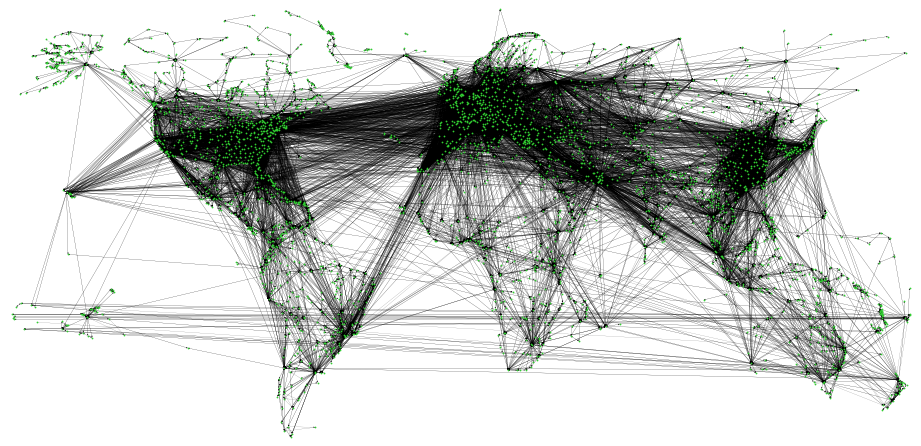

In [ ]:
# plot network
fig = plt.figure(1, figsize=(12.6, 6))
nx.draw(simple_flight_network, node_size=0.6, width=0.1, arrowsize=3, pos=positions, node_color="limegreen")

# remove white space at margins
plt.xlim(1.01*min(xx for xx,yy in positions.values()), 1.01*max(xx for xx,yy in positions.values()))
plt.ylim(1.01*min(yy for xx,yy in positions.values()), 1.01*max(yy for xx,yy in positions.values()))

# export as png
fig.savefig('/content/final_network.pdf', format='pdf', dpi=200)

In [ ]:
# export network to run simulations in another file
nx.write_graphml(simple_flight_network, "/content/simple_flight_network.graphml")